In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch                 # for dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [2]:
Airlines=pd.read_csv("EastWestAirlines.csv")
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Airlines1=Airlines.iloc[:,1:]
# Airlines1

In [4]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Hierarchical Clustering

In [5]:
norm = MinMaxScaler()                                 #Normalization function 
Airlines_normal=norm.fit_transform(Airlines.iloc[:,1:])        #Normalizing the data
Airlines_normal

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

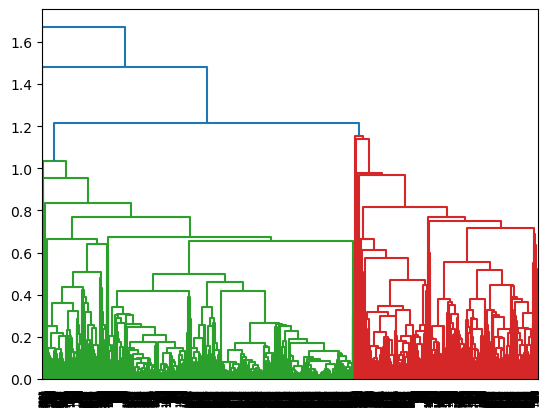

In [6]:
dendrogram = sch.dendrogram(sch.linkage(Airlines_normal,method='average'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean',distance_threshold=None)

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(Airlines_normal)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [9]:
set(y_hc)            #gives unique values

{0, 1, 2}

In [10]:
Airlines['Hierarchical cluster'] = y_hc
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [11]:
Airlines.sort_values("Hierarchical cluster")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1459,1473,315273,0,1,1,1,12584,9,4084,4,5079,1,0
1455,1469,49438,0,4,1,1,33912,14,0,0,5085,1,0
3069,3091,105544,0,4,1,1,31001,16,500,1,2888,1,0
1452,1466,147822,0,4,1,1,42469,18,0,0,5107,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,3364,39566,0,2,1,1,23755,18,0,0,1763,0,2
3343,3366,41628,0,3,1,1,16771,12,0,0,1818,0,2
1057,1068,235567,0,3,1,1,16106,15,0,0,5728,0,2
1074,1085,70877,0,2,1,1,8956,15,0,0,5696,0,2


In [12]:
Airlines.iloc[:,1:].groupby("Hierarchical cluster").mean(numeric_only=True)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hierarchical cluster,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0


# Analysis

In [13]:
# cluster2 has highest Number of miles eligible for award travel
# cluster1 has highest Number of miles counted as qualifying for Topflight status
# cluster2 has highest Number of miles earned with freq. flyer credit card in the past 12 months
# cluster1 has highest Number of miles earned with Rewards credit card in the past 12 months
# cluster2 has highest Number of miles earned with Small Business credit card in the past 12 months
# cluster0 has highest Number of miles earned from non-flight bonus transactions in the past 12 months
# cluster2 has highest Number of non-flight bonus transactions in the past 12 months
# cluster0 has highest Number of flight miles in the past 12 months 
# cluster0 has highest Number of flight transactions in the past 12 months
# cluster0 has highest Number of days since Enroll_date

# K-Means clusterring

In [14]:
# Standardisation function            #Standardization = x-mean/sd,             Normalization = x-xmin/xmax-xmin 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airlines_df = pd.DataFrame(scaler.fit_transform(Airlines.iloc[:,1:-1]),columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']) 
scaled_Airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [15]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

[43988.999999999985, 35409.51662986132, 32895.91101443952, 28909.47940043057, 26975.779233037058, 25599.269402878563, 24433.62444554321, 20713.28456478709, 17306.440055842497, 14732.229882347432, 13939.921489963039, 12947.287736463828, 12583.605764621509, 12168.115025733086, 11719.957956655788, 11344.165641993144, 10936.426749425345, 10643.356847965188, 10190.712551029781]


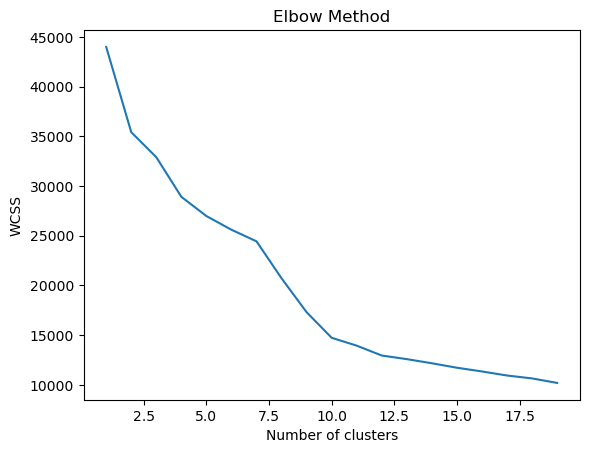

In [16]:
wcss = []
for i in range(1, 20):        #clusters 1 to 10 compute (wcss)within cluster sum of squre
    
    kmeans = KMeans(n_clusters=i,n_init='auto',random_state=42 )
    kmeans.fit(scaled_Airlines_df)
    #kmeans.fit(Univ1)
    wcss.append(kmeans.inertia_)
print(wcss)    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=250)             #from graph 5 as after that clustering is slightly decreasing
clusters_new.fit(scaled_Airlines_df)

C:\Users\pirfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=250)

In [18]:
set(clusters_new.labels_)                         #gives unique values

{0, 1}

In [19]:
#Assign clusters to the data set
Airlines['Kmean cluster'] = clusters_new.labels_
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster,Kmean cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [20]:
Airlines.sort_values(by = "Kmean cluster")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster,Kmean cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2578,2597,29346,0,1,1,1,150,1,150,1,2773,0,1,0
2580,2599,42366,0,2,1,1,6293,9,0,0,2770,0,2,0
2581,2600,151336,651,1,1,1,11400,6,1000,4,2742,0,1,0
2582,2601,48363,0,1,1,1,790,3,0,0,2766,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1087,35342,0,5,1,1,70454,12,0,0,5534,1,0,1
2693,2713,102942,0,5,1,1,56780,18,0,0,2405,0,2,1
2690,2710,76938,0,3,1,1,23503,13,0,0,2422,1,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,2,1


In [21]:
#these are standardized values.
# clusters_new.cluster_centers_

In [22]:
Airlines.iloc[:,1:].groupby('Kmean cluster').mean(numeric_only=True)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster
Kmean cluster,,,,,,,,,,,,
0,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897,0.956248
1,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909,0.573733


In [23]:
# Quality of clusters is expressed in terms of Silhoutte score

from sklearn.metrics import silhouette_score
score =silhouette_score(scaled_Airlines_df, clusters_new.labels_ , metric='euclidean')
score    #It should be in between -1 to +1

0.32542136327826215

# Analysis of above

In [24]:
# cluster1 has highest Number of miles eligible for award travel
# cluster1 has highest Number of miles counted as qualifying for Topflight status
# cluster1 has highest Number of miles earned with freq. flyer credit card in the past 12 months
# cluster0 has highest Number of miles earned with Rewards credit card in the past 12 months
# cluster1 has highest Number of miles earned with Small Business credit card in the past 12 months
# cluster1 has highest Number of miles earned from non-flight bonus transactions in the past 12 months
# cluster1 has highest Number of non-flight bonus transactions in the past 12 months
# cluster1 has highest Number of flight miles in the past 12 months 
# cluster1 has highest Number of flight transactions in the past 12 months
# cluster1 has highest Number of days since Enroll_date

# DBSCAN

In [25]:
# Standardisation function            #Standardization = x-mean/sd,             Normalization = x-xmin/xmax-xmin 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Airlines.iloc[:,1:-3]),columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']) 
X
#scaled_Airlines_df


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


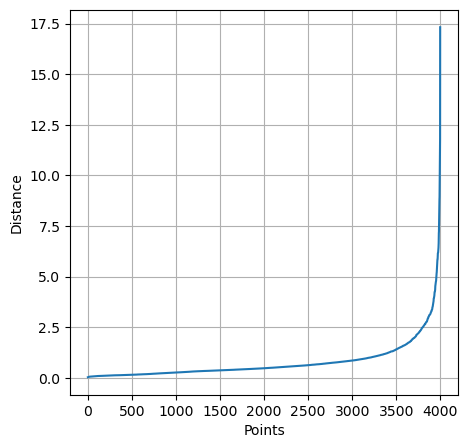

In [26]:
#Knee plot it gives epsolon (E) 
#we cant specify no.of cluster in dbscan  
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)    #specifying to take 11 neighbors @Own
neighbors = nearest_neighbors.fit(X)                    #we get 10 neighbor distances & indices

distances, indices = neighbors.kneighbors(X)
# print(distances)
# print(indices)
# print(distances.shape)
distances = np.sort(distances[:,10], axis=0)           #sorting distance then taking val i.e largest distance
#print(distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

1.4408823162585567


<Figure size 500x500 with 0 Axes>

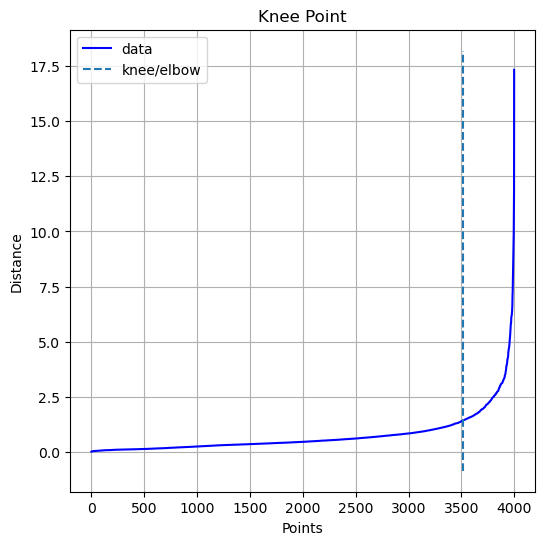

In [27]:
 from kneed import KneeLocator

 i = np.arange(len(distances))
 knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

 fig = plt.figure(figsize=(5, 5))
 knee.plot_knee()
 plt.xlabel("Points")
 plt.ylabel("Distance")
 plt.grid()

 print(distances[knee.knee])

In [28]:
dbscan = DBSCAN(eps=1.5, min_samples=3)     #1.5 from above graph 
clusters = dbscan.fit_predict(X)

In [29]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
set(clusters)      #gives uniqure clusters , -1 are noise points

{-1, 0, 1, 2, 3, 4, 5}

In [31]:
Airlines['DBSCAN']=dbscan.labels_         #now adding cluster clmn with predicted
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster,Kmean cluster,DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [32]:
# Use pandas filtering and get noisy datapoints -1
Airlines[Airlines['DBSCAN']==-1]
#Noise are not Directly density reachable,density reachable,density connected

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical cluster,Kmean cluster,DBSCAN
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,1,-1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,0,1,-1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1,0,1,-1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,0,1,-1
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,0,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1,1,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2,1,-1


# Silhouette Score

In [33]:
#it shld be in -1 to +1
from sklearn.metrics import silhouette_score
score =silhouette_score(X, dbscan.labels_ , metric='euclidean')
score 

0.4209689494859992